# 15 Minute Series: Demographic Analysis of Washington DC
---

*Cara Higashi, Robert Lopez, Joseph Sy, Giovanni Ramos Gutierrez*

## Interpolation
---

In [1]:
import geopandas as gpd

In [2]:
file_path = 'data/dc_interpolation/dc_interpolation.shp'
dc_interpolation = gpd.read_file(file_path)


ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [3]:
dc_interpolation

,n_total_po,per_capita,p_nonhisp_,p_hispanic,p_nonhis_1,p_asian_pe,access,geometry
0,1.281000e+03,134915.000000,0.000000,13.973458,79.781421,2.576112,access,"POLYGON ((-77.05702 38.91055, -77.05666 38.910..."
1,1.681285e+03,161980.000000,0.991633,11.434769,81.158971,5.701890,access,"MULTIPOLYGON (((-77.06275 38.90231, -77.06275 ..."
2,3.817649e+03,4191.000000,7.338751,14.144236,51.828339,21.178263,access,"POLYGON ((-77.07902 38.91268, -77.07855 38.912..."
3,2.678122e+03,114134.000000,3.028249,8.949153,76.135593,9.152542,access,"MULTIPOLYGON (((-77.07263 38.90532, -77.07214 ..."
4,5.958477e+03,99617.994062,3.084143,14.817297,73.835061,4.207174,access,"POLYGON ((-77.08201 38.92152, -77.08182 38.921..."
...,...,...,...,...,...,...,...,...
311,2.303735e+03,73420.000000,33.165618,18.280922,42.599581,1.090147,no_access,"POLYGON ((-77.01675 38.87646, -77.01620 38.876..."
312,1.519000e+03,106678.000000,15.799868,4.937459,68.466096,4.476629,no_access,"POLYGON ((-77.02188 38.87650, -77.02149 38.877..."
313,2.873962e+03,39253.000000,65.446841,18.220339,12.654083,1.406009,no_access,"MULTIPOLYGON (((-76.96608 38.93397, -76.96583 ..."
314,1.328309e+01,0.000000,0.000000,0.000000,99.999994,0.000000,no_access,"MULTIPOLYGON (((-77.06463 38.89184, -77.06435 ..."


In [4]:
dc_interpolation = dc_interpolation.rename(columns={
    'n_total_po': 'n_total_pop',
    'per_capita': 'per_capita_income',
    'p_nonhisp_': 'p_nonhisp_black_persons',
    'p_hispanic': 'p_hispanic_persons',
    'p_nonhis_1': 'p_nonhisp_white_persons',
    'p_asian_pe': 'p_asian_persons'
})


In [5]:
variables = [
   'n_total_pop', 'per_capita_income', 'p_nonhisp_black_persons', 'p_hispanic_persons', 'p_nonhisp_white_persons', 'p_asian_persons'

]


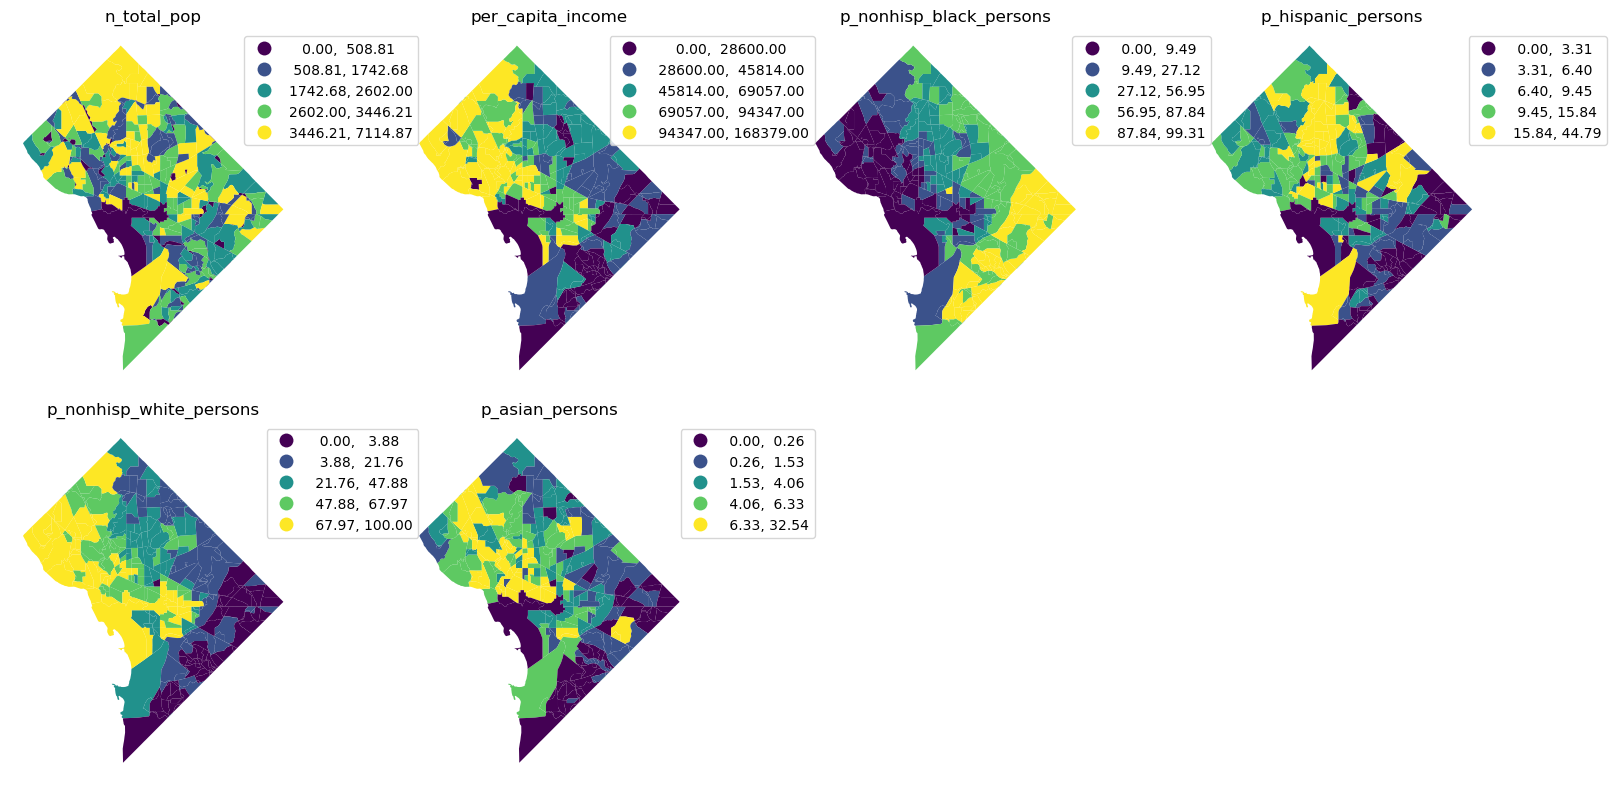

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    dc_interpolation.plot(column=var, scheme='quantiles', cmap='viridis', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1.45, 1)})
    ax.set_title(var)
    for ax in axes:
     ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
access_subset = dc_interpolation[dc_interpolation['access'] == 'access']


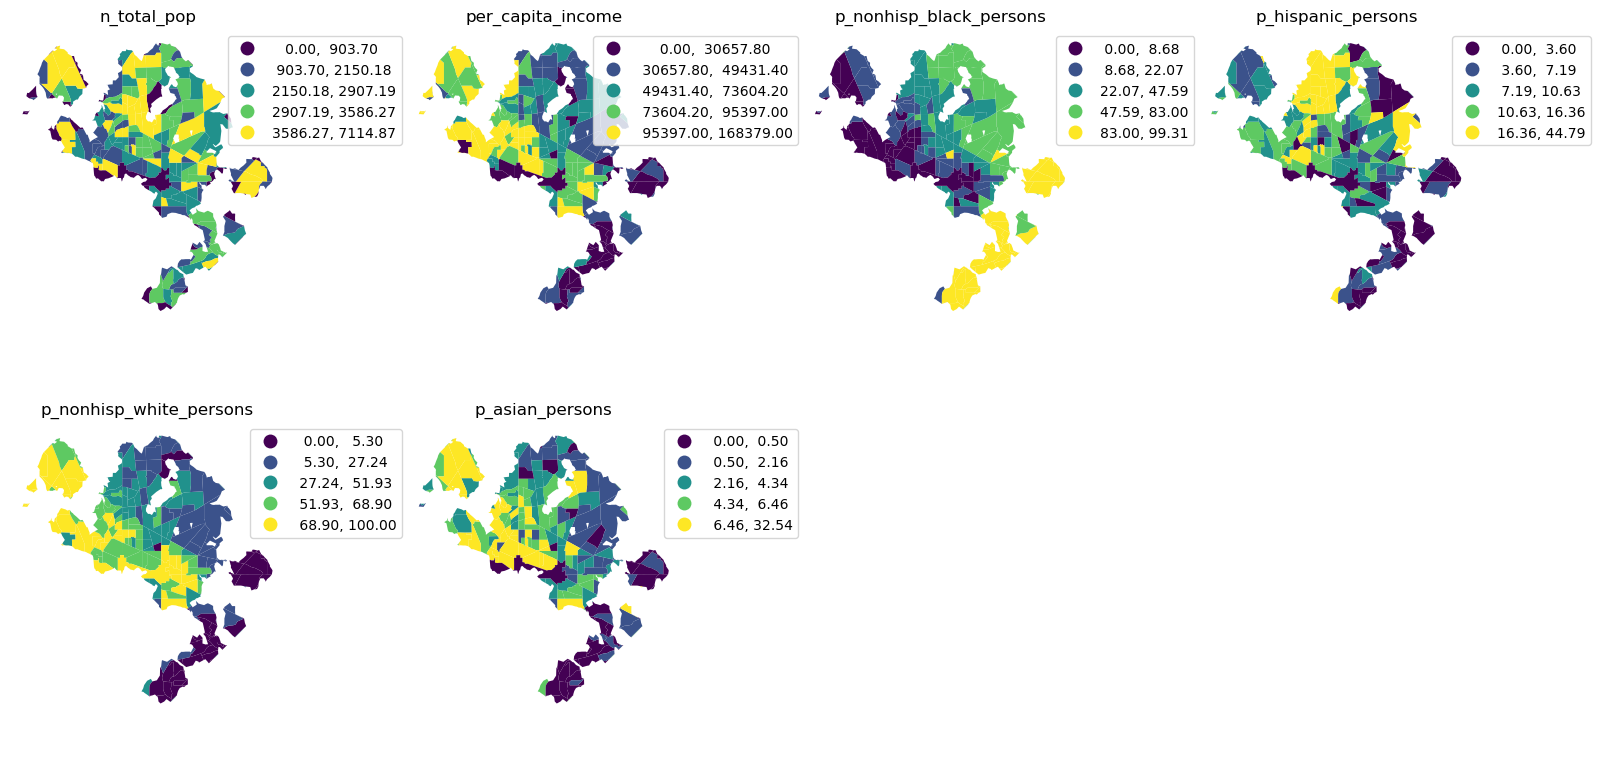

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    access_subset.plot(column=var, scheme='quantiles', cmap='viridis', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1.45, 1)})
    ax.set_title(var)
    for ax in axes:
     ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
no_access_subset = dc_interpolation[dc_interpolation['access'] == 'no_access']


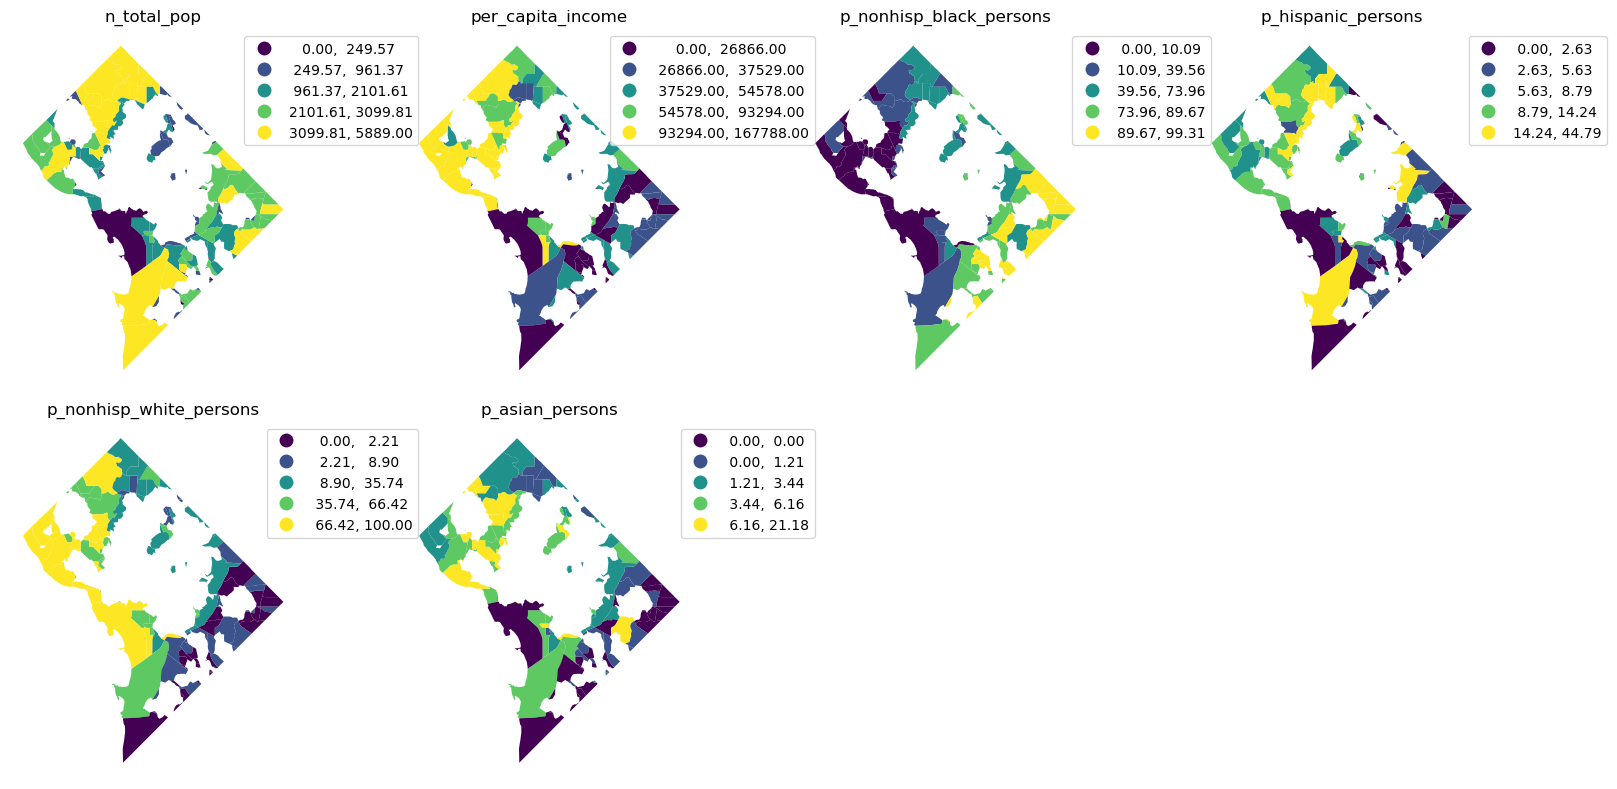

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    no_access_subset.plot(column=var, scheme='quantiles', cmap='viridis', legend=True, ax=ax, legend_kwds={'bbox_to_anchor': (1.45, 1)})
    ax.set_title(var)
    for ax in axes:
     ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
dc_interpolation[['per_capita_income', 'p_nonhisp_black_persons', 'p_hispanic_persons', 'p_nonhisp_white_persons', 'p_asian_persons','access']].groupby(by='access').mean()

,per_capita_income,p_nonhisp_black_persons,p_hispanic_persons,p_nonhisp_white_persons,p_asian_persons
access,,,,,
access,65557.835562,41.898920,10.887314,38.780712,4.314516
no_access,56964.098637,52.005761,9.194092,31.230019,3.512078


In [12]:
access = dc_interpolation[dc_interpolation['access'] == 'access']

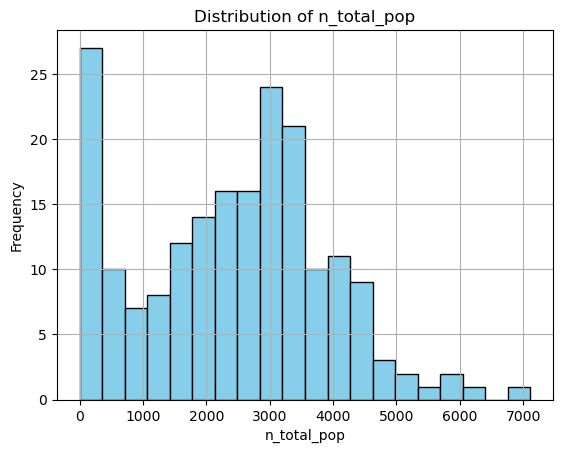

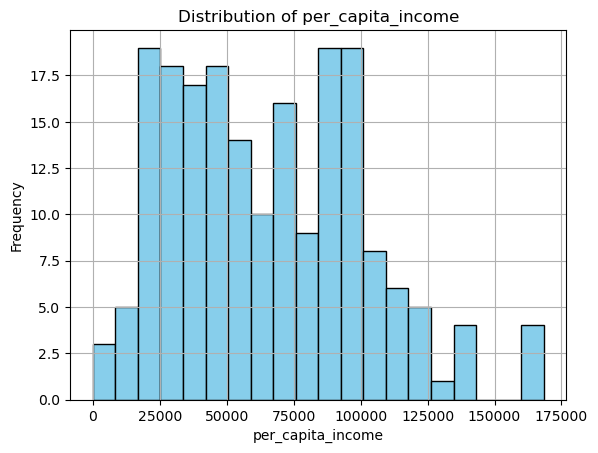

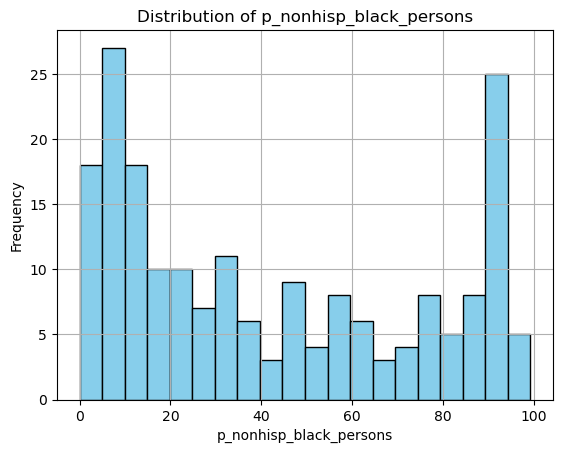

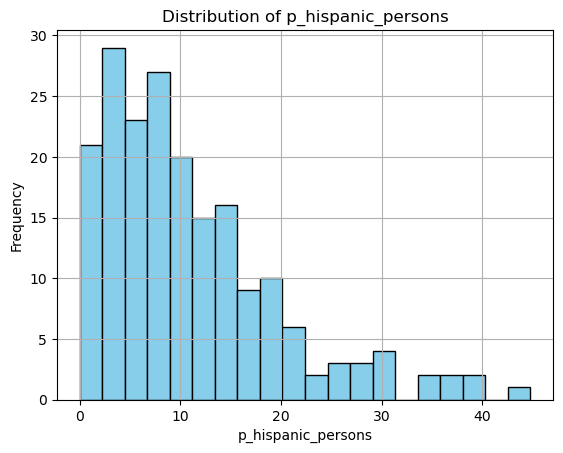

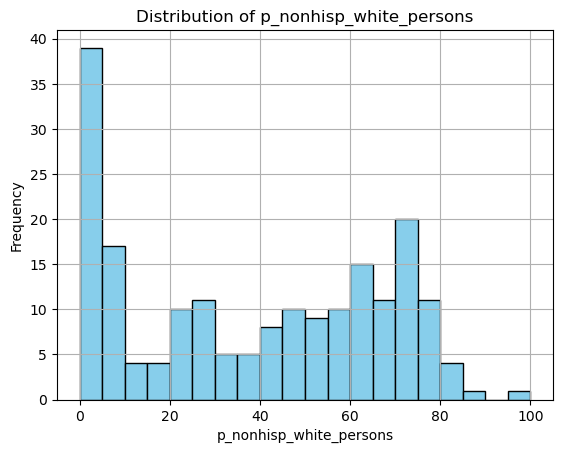

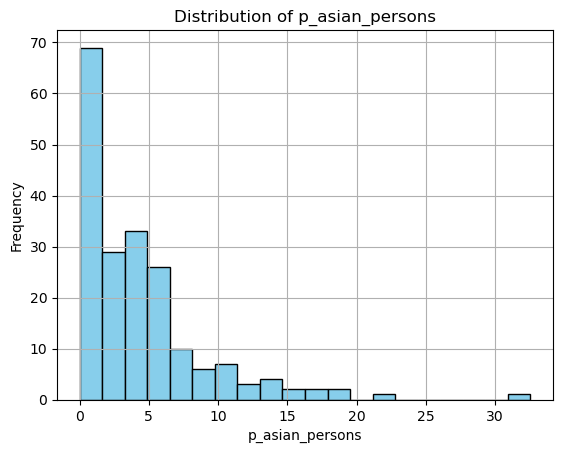

In [13]:
import matplotlib.pyplot as plt

for variable in variables:
    plt.figure()  
    plt.hist(access[variable], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.show()

The per_capita_income histogram for areas that have access to the key services within a 15-minute city framework — transportation, education, parks, grocery stores, and hospitals displays a distribution that is right-skewed (positively skewed). This means there are fewer areas with high per capita incomes, and these high values stretch the tail of the distribution to the right. The distribution's peak is between 50,000 and 75,000, which suggests this is the most common per capita income range among the areas studied. The histogram shows a broad range of income levels, from very low to high, but with most areas clustering in the middle-income range. The right skewness indicates a presence of economic inequality, where a small number of areas have significantly higher incomes compared to the majority. This suggests that while access to essential services is available, economic benefits are not uniformly distributed.
The per capita income distribution for areas with access to essential services within the "15-minute city" concept shows a predominance of middle-income ranges with a tail indicating wealthier pockets.

In [14]:
no_access= dc_interpolation[dc_interpolation['access'] == 'no_access']

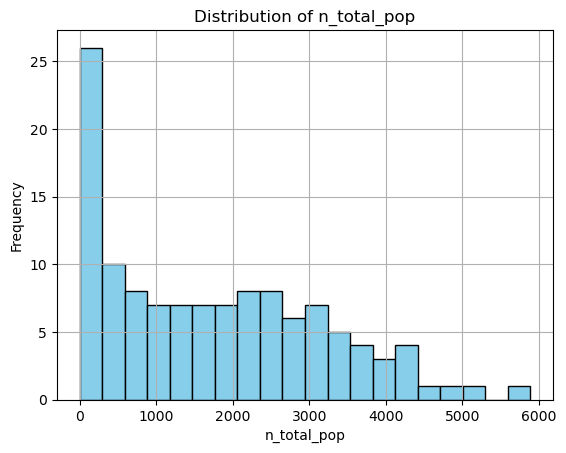

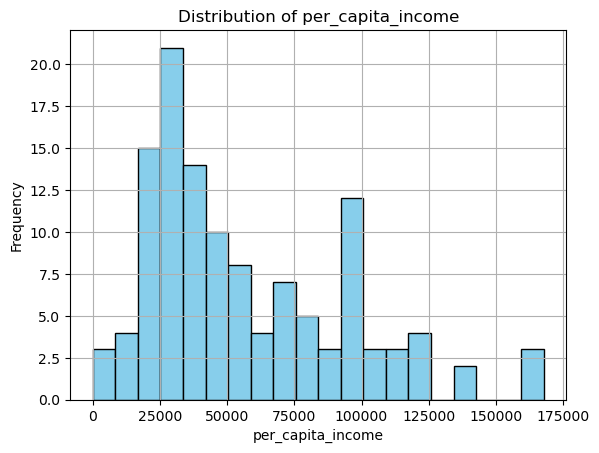

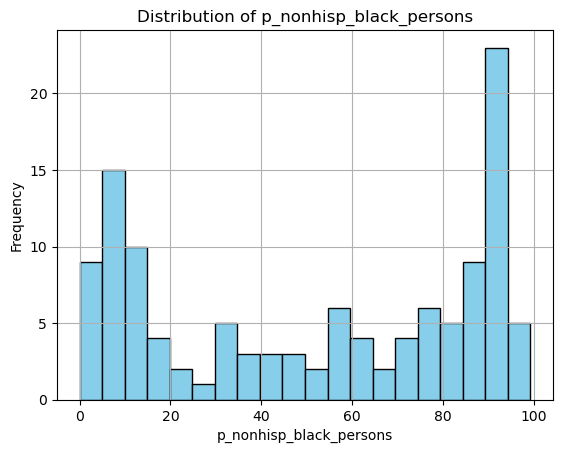

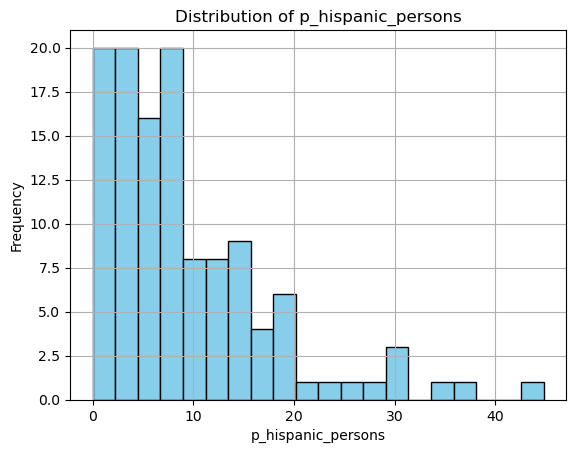

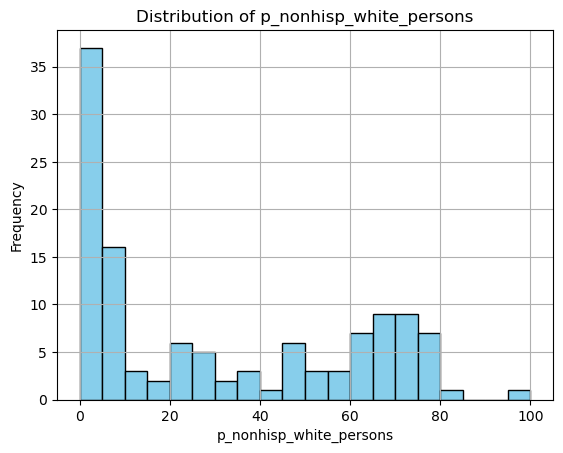

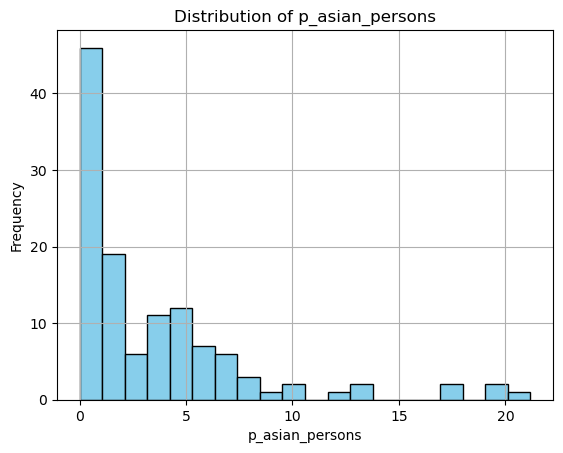

In [15]:
for variable in variables:
    plt.figure()  
    plt.hist(no_access[variable], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.show()

In the analysis of the per capita income distribution across the areas that don't have access to the key services within a 15-minute city framework, the histogram reveals a right-skewed (positively skewed) pattern. This skewness is characterized by a longer tail on the right side of the distribution, indicating that while the majority of the areas cluster around lower income values, there are a few areas with significantly higher incomes that extend the distribution's tail. 
The mean (average) per capita income is likely higher than the median due to the influence of the high-income values on the average. This suggests that while the average might indicate a relatively higher income level, the median better represents the typical income level in most areas.
Distribution Characteristics: Most areas have per capita incomes concentrated between 25,000 and 50,000, with the frequency diminishing significantly as income increases. The distribution exhibits few areas with very high incomes (over $100,000), which are enough to skew the distribution rightward.